In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

import scipy.io as sio
from motiflets.plotting import *
import matplotlib as mpl

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

path = "../../motiflets_use_cases/chains/"

In [ ]:
def read_penguin_data():
    series = pd.read_csv(path + "penguin.txt", delimiter="\t", header=None)
    ds_name = "Penguins (Longer Snippet)"
    return ds_name, series


def read_penguin_data_short():
    test = sio.loadmat(path + 'penguinshort.mat')
    series = pd.DataFrame(test["penguinshort"]).T
    ds_name = "Penguins (Snippet)"
    return ds_name, series


def test_plot_data():
    ds_name, series = read_penguin_data()
    series = series.iloc[497699 - 5000: 497699 + 5000, np.array([0, 7])].T

    ml = Motiflets(ds_name, series, elbow_deviation=1.25)
    ml.plot_dataset()

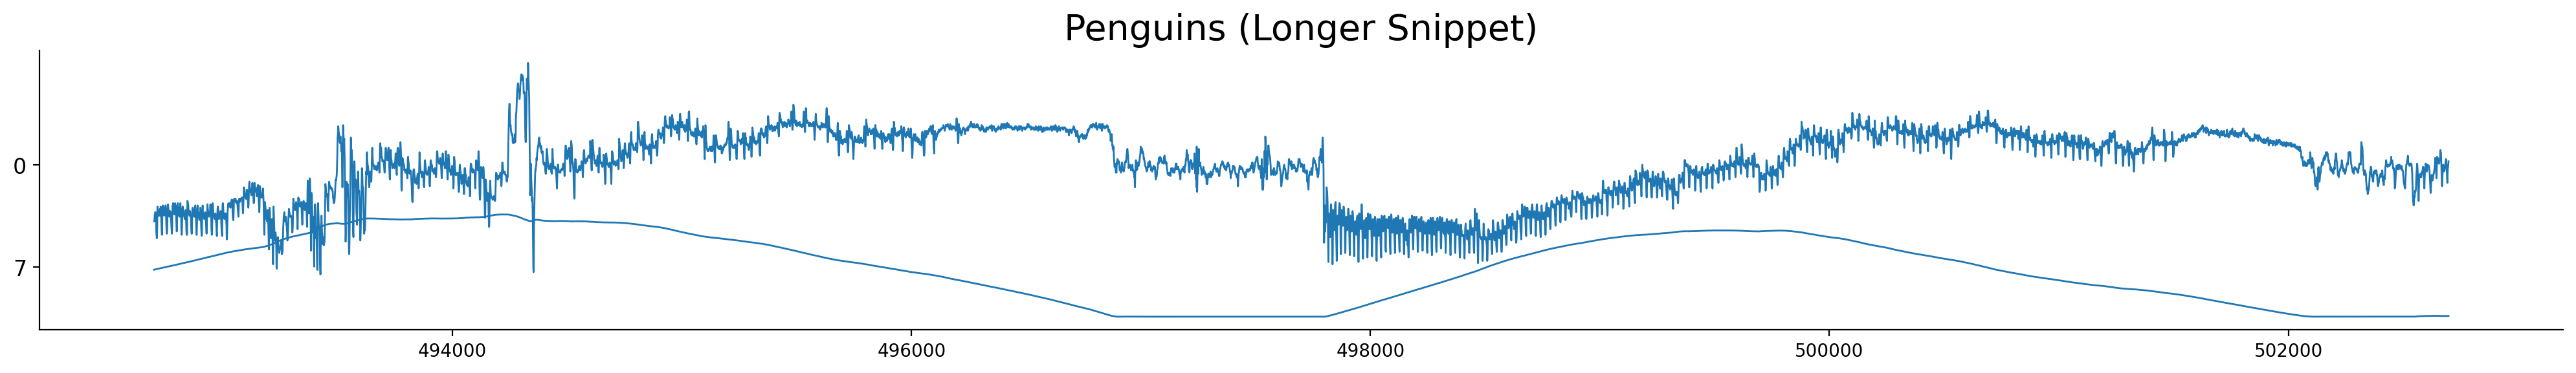

In [3]:
test_plot_data()

Compute ks (21):   0%|          | 0/20 [00:00<?, ?it/s]

Compute ks (22):   0%|          | 0/21 [00:00<?, ?it/s]

Compute ks (22):   0%|          | 0/21 [00:00<?, ?it/s]

Compute ks (23):   0%|          | 0/22 [00:00<?, ?it/s]

Compute ks (23):   0%|          | 0/22 [00:00<?, ?it/s]

Compute ks (24):   0%|          | 0/23 [00:00<?, ?it/s]

Compute ks (24):   0%|          | 0/23 [00:00<?, ?it/s]

Compute ks (25):   0%|          | 0/24 [00:00<?, ?it/s]

Compute ks (26):   0%|          | 0/25 [00:00<?, ?it/s]

Compute ks (26):   0%|          | 0/25 [00:00<?, ?it/s]

Compute ks (27):   0%|          | 0/26 [00:00<?, ?it/s]

Compute ks (28):   0%|          | 0/27 [00:00<?, ?it/s]

Compute ks (29):   0%|          | 0/28 [00:00<?, ?it/s]

Compute ks (30):   0%|          | 0/29 [00:00<?, ?it/s]

Compute ks (30):   0%|          | 0/29 [00:00<?, ?it/s]

Compute ks (31):   0%|          | 0/30 [00:00<?, ?it/s]

Compute ks (32):   0%|          | 0/31 [00:00<?, ?it/s]

Compute ks (33):   0%|          | 0/32 [00:00<?, ?it/s]

Compute ks (35):   0%|          | 0/34 [00:00<?, ?it/s]

Compute ks (36):   0%|          | 0/35 [00:00<?, ?it/s]

Compute ks (37):   0%|          | 0/36 [00:00<?, ?it/s]

Compute ks (39):   0%|          | 0/38 [00:00<?, ?it/s]

Compute ks (40):   0%|          | 0/39 [00:00<?, ?it/s]

Compute ks (42):   0%|          | 0/41 [00:00<?, ?it/s]

Compute ks (43):   0%|          | 0/42 [00:00<?, ?it/s]

Compute ks (45):   0%|          | 0/44 [00:00<?, ?it/s]

Compute ks (47):   0%|          | 0/46 [00:00<?, ?it/s]

Compute ks (49):   0%|          | 0/48 [00:00<?, ?it/s]

Compute ks (50):   0%|          | 0/49 [00:00<?, ?it/s]

Compute ks (50):   0%|          | 0/49 [00:00<?, ?it/s]

Compute ks (50):   0%|          | 0/49 [00:00<?, ?it/s]

Compute ks (50):   0%|          | 0/49 [00:00<?, ?it/s]

Compute ks (50):   0%|          | 0/49 [00:00<?, ?it/s]

Compute ks (50):   0%|          | 0/49 [00:00<?, ?it/s]

Compute ks (50):   0%|          | 0/49 [00:00<?, ?it/s]

	Time 1.3 s


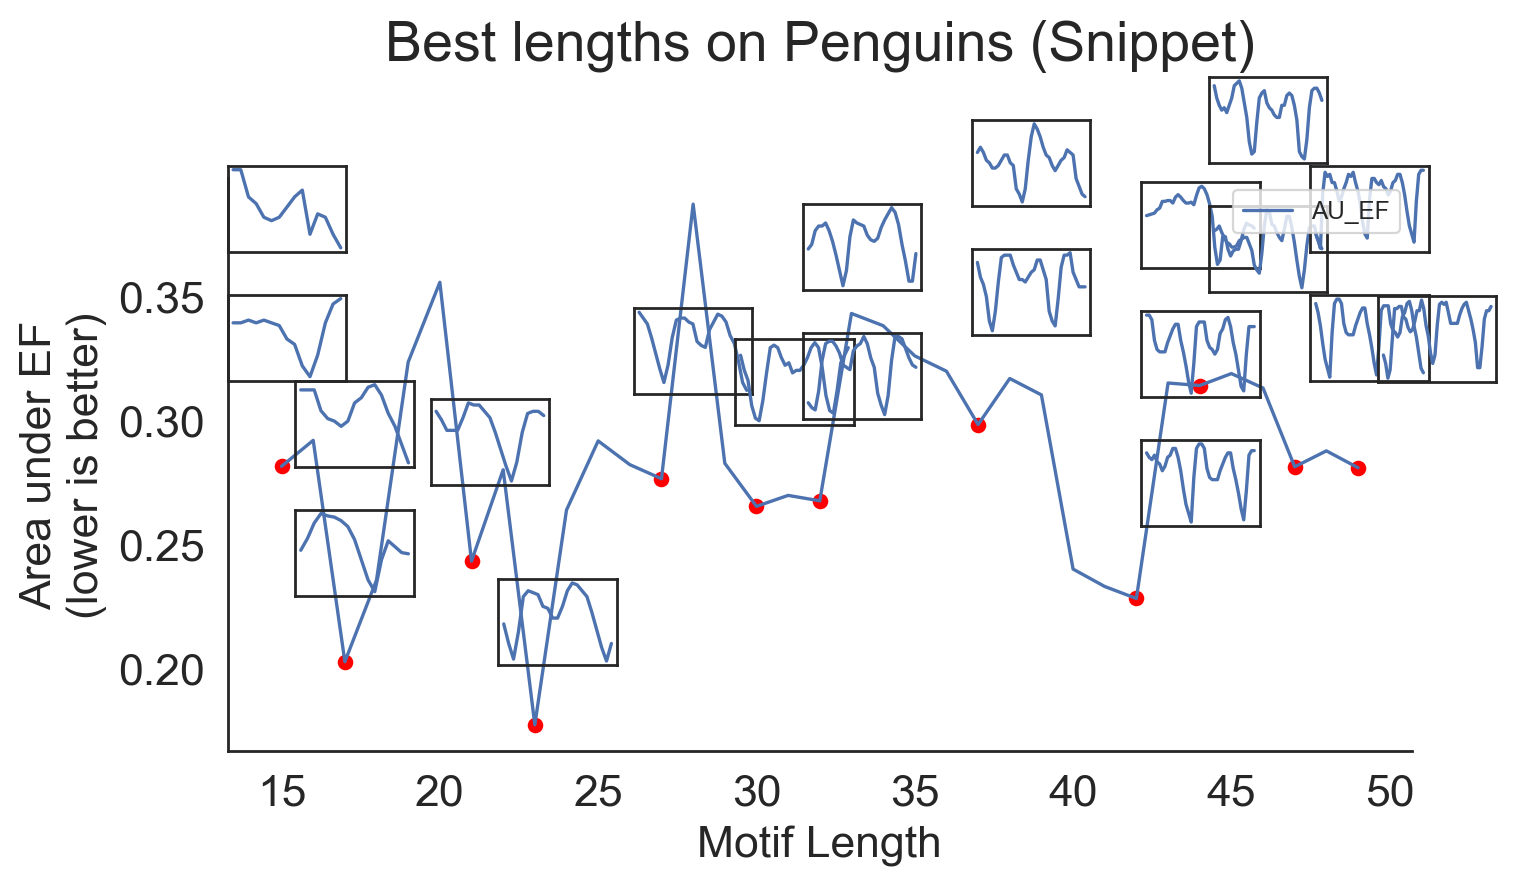

In [23]:
ds_name, series = read_penguin_data_short()

ml = Motiflets(
    ds_name, series,
    elbow_deviation=1,
    slack=0.8
)
# ml.plot_dataset()

k_max = 50
motif_length_range = np.arange(15, 50, 1)

_, all_minima = ml.fit_motif_length(
    k_max, motif_length_range,
    plot_elbows=False,
    plot_motifs_as_grid=False,
    plot_best_only=True,
    subsample=1)

# fig, ax = ml.plot_motifset()

In [28]:
@interact(motif_length = ml.motif_length_range[ml.all_extrema])
def show(motif_length=ml.motif_length):
    x = np.searchsorted(ml.all_extrema, motif_length)
    motif_length = ml.motif_length_range[x]
    candidates = np.zeros(len(ml.all_dists[x]), dtype=np.object)
    candidates[ml.all_elbows[x]] = ml.all_top_motiflets[x]  # need to unpack
    elbow_points = ml.all_elbows[x]

    # _plot_elbow_points(
    #    ml.ds_name, ml.data, motif_length, ml.all_elbows, candidates, ml.all_dists[x])

    plot_grid_motiflets(
        ml.ds_name, ml.series, 
        candidates, elbow_points,
        ml.all_dists[x], motif_length, 
        show_elbows=True,
        font_size=24,
        ground_truth=ml.ground_truth,
        dimension_labels=ml.dimension_labels)

interactive(children=(Dropdown(description='motif_length', index=3, options=(15, 17, 21, 23, 27, 30, 32, 37, 4…

Data (1, 901)


Compute ks (50):   0%|          | 0/49 [00:00<?, ?it/s]

Chosen window-size: 21 in 0.1 s
Elbow Points [45]


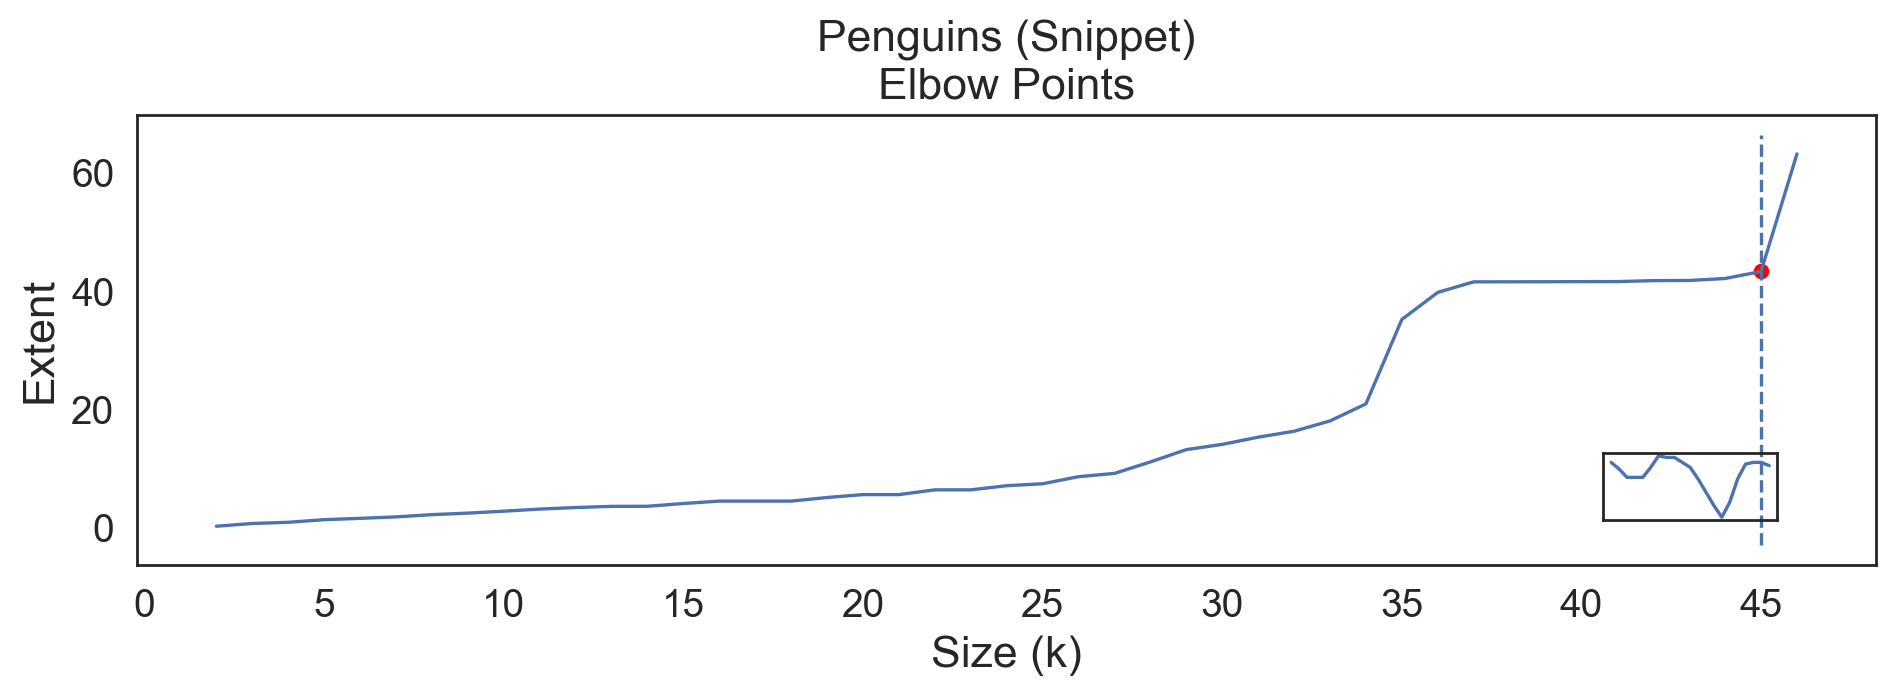

In [33]:
motif_length = 21
_ = ml.fit_k_elbow(
    k_max,
    motif_length=motif_length,  
    filter_duplicates=True,
    plot_elbows=True,
    plot_motifs_as_grid=False,
)

In [49]:
@interact(k = widgets.IntSlider(min=2, max=k_max, step=1))
def show_elbows(k=ml.elbow_points[-1]):
    ml.plot_motifset(k)

interactive(children=(IntSlider(value=2, description='k', max=50, min=2), Output()), _dom_classes=('widget-int…